In [82]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [3]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [4]:
data.shape

(491, 14)

In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [6]:
test.shape

(123, 12)

In [7]:
data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
test.isnull().sum()

Loan_ID              0
Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [9]:
data['Loan_Status'].value_counts(normalize = True)

1    0.698574
0    0.301426
Name: Loan_Status, dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


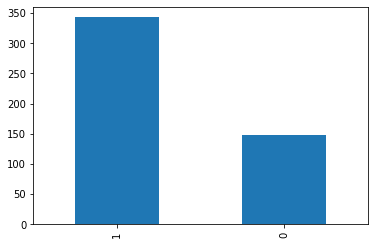

In [11]:
data['Loan_Status'].value_counts().plot.bar()

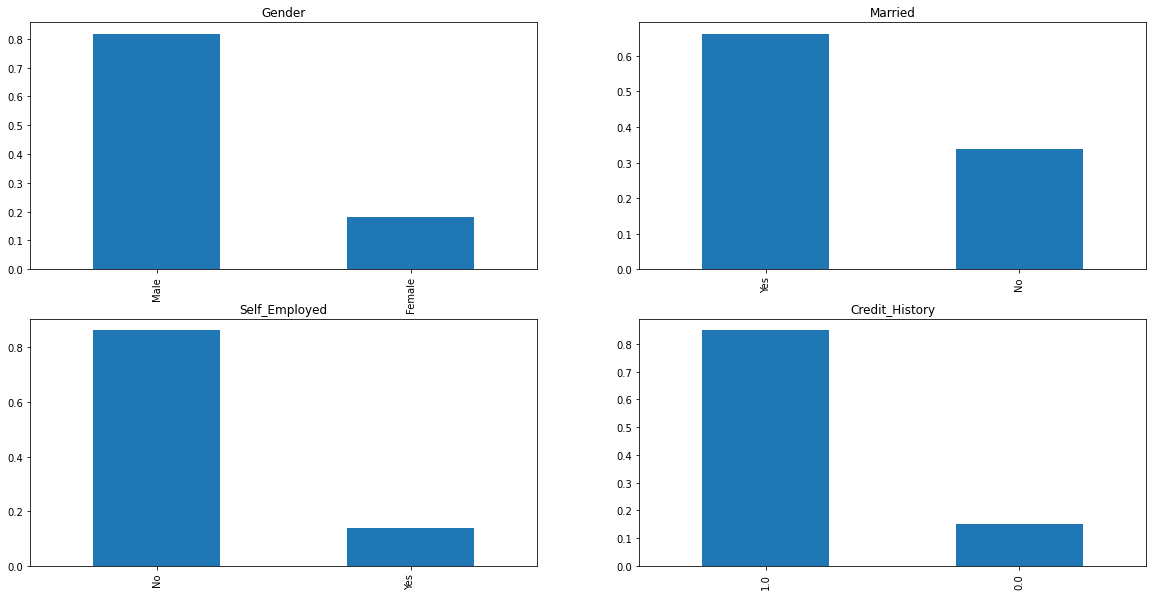

In [12]:
plt.subplot(221)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
data['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.show()

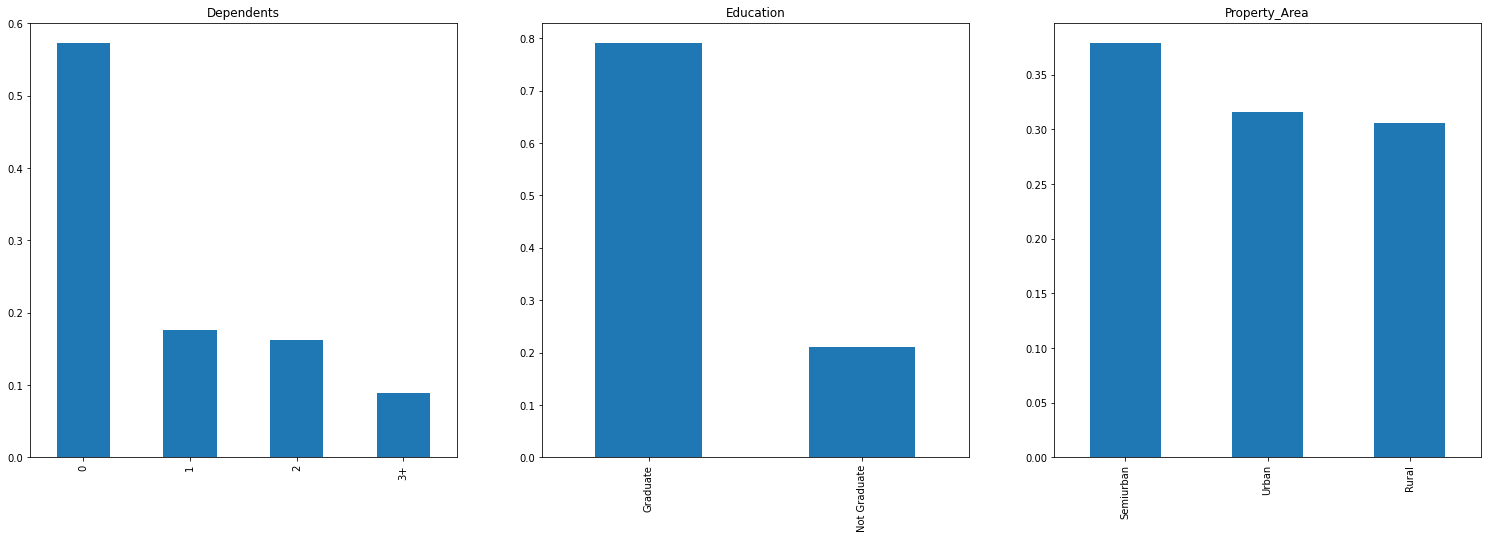

In [13]:
plt.subplot(131)
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(26,8),title='Dependents')

plt.subplot(132)
data['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


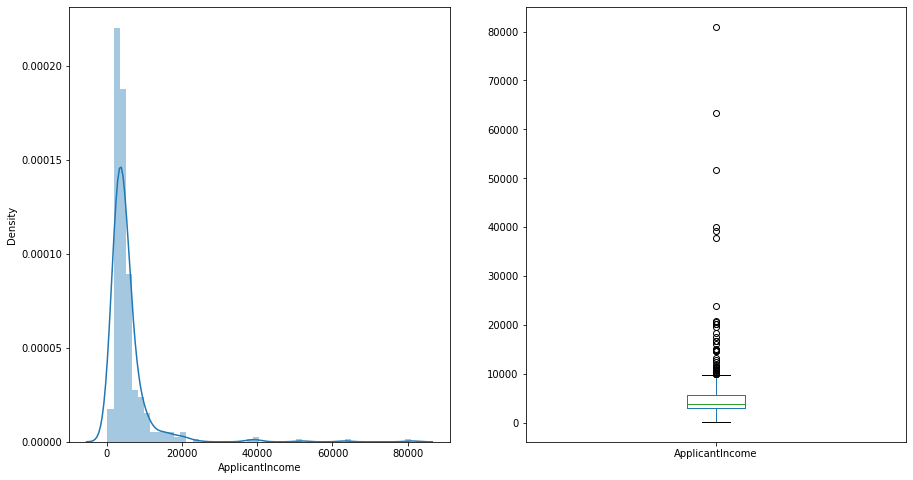

In [14]:
plt.subplot(121)
sns.distplot(data['ApplicantIncome'])

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(15,8))
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, ' ')

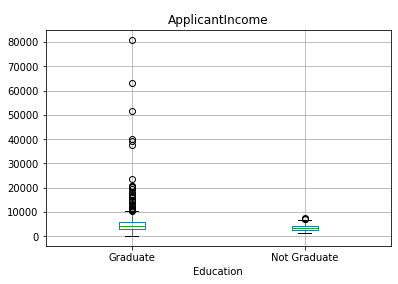

In [15]:
data.boxplot(column ='ApplicantIncome',by ='Education')
plt.suptitle(" ")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


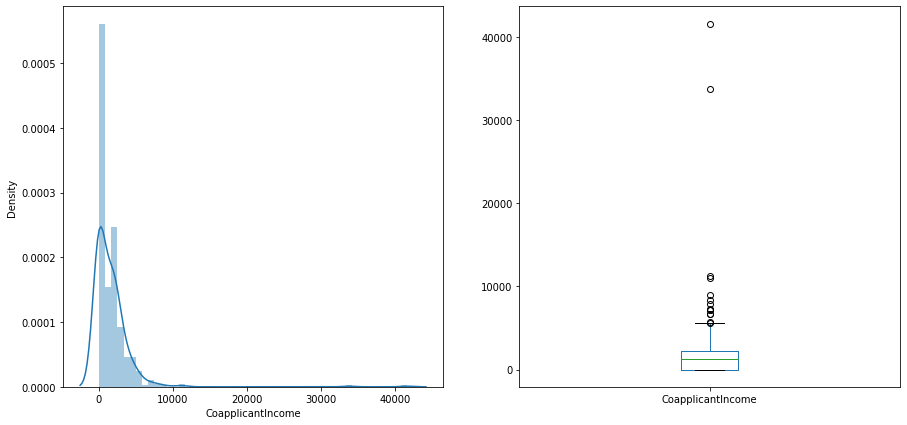

In [16]:
plt.subplot(121)
sns.distplot(data['CoapplicantIncome'])

plt.subplot(122)
data['CoapplicantIncome'].plot.box(figsize =(15,7))
plt.show()

In [19]:
data['Dependents'].replace('3+',3,inplace =True)
data['Dependents'].replace('3+',3,inplace =True)
data['Gender'].replace('Female',0,inplace =True)
data['Gender'].replace('Male',1,inplace =True)
data['Self_Employed'].replace('No',0,inplace =True)
data['Self_Employed'].replace('Yes',1,inplace =True)
data['Married'].replace('No',0,inplace =True)
data['Married'].replace('Yes',1,inplace =True)
data['Education'].replace('Graduate',0,inplace =True)
data['Education'].replace('Not Graduate',1,inplace =True)
data.nunique()

Unnamed: 0           491
Loan_ID              491
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      408
CoapplicantIncome    239
LoanAmount           176
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [21]:
test['Dependents'].replace('3+',3,inplace =True)
test['Dependents'].replace('3+',3,inplace =True)
test['Gender'].replace('Female',0,inplace =True)
test['Gender'].replace('Male',1,inplace =True)
test['Self_Employed'].replace('No',0,inplace =True)
test['Self_Employed'].replace('Yes',1,inplace =True)
test['Married'].replace('No',0,inplace =True)
test['Married'].replace('Yes',1,inplace =True)
test['Education'].replace('Graduate',0,inplace =True)
test['Education'].replace('Not Graduate',1,inplace =True)


In [23]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(0,inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data.isna().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(0,inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [25]:
data['LoanAmount']=data['LoanAmount'].fillna(np.mean(data['LoanAmount']))
data.isna().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
test['LoanAmount']=test['LoanAmount'].fillna(np.mean(test['LoanAmount']))
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             491 non-null    float64
 3   Married            491 non-null    float64
 4   Dependents         491 non-null    float64
 5   Education          491 non-null    int64  
 6   Self_Employed      491 non-null    float64
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         491 non-null    float64
 10  Loan_Amount_Term   491 non-null    float64
 11  Credit_History     491 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 53.8+ KB


In [31]:
data['Dependents'] = data['Dependents'].astype(float)

In [33]:
test['Dependents'] = test['Dependents'].astype(float)

In [34]:
test.shape

(123, 12)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


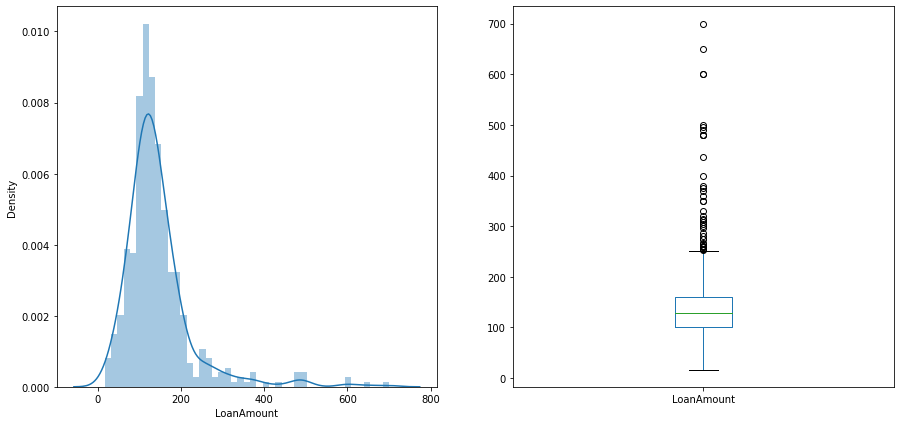

In [35]:
plt.subplot(121)
#df=data.dropna()
sns.distplot(data['LoanAmount'])

plt.subplot(122)
data['LoanAmount'].plot.box(figsize =(15,7))
plt.show()

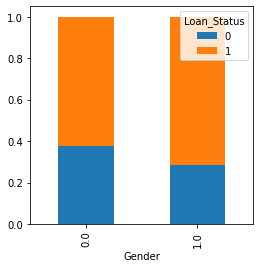

In [36]:
sex=pd.crosstab(data['Gender'],data['Loan_Status'])
sex.div(sex.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

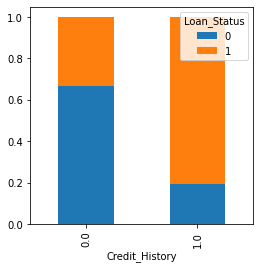

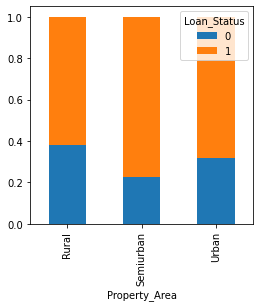

In [37]:
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

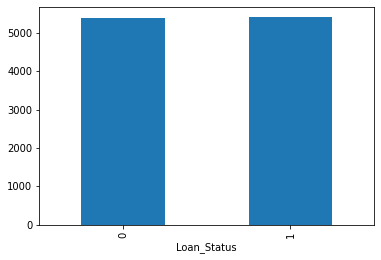

In [38]:
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [39]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,0.0,0.0,0.0,0,0.0,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,1.0,1.0,3.0,1,1.0,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,0.0,1.0,0.0,0,0.0,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,1.0,1.0,0.0,1,1.0,4695,0.0,96.0,360.0,1.0,Urban,1
4,4,LP002529,1.0,1.0,2.0,0,0.0,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [40]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,1.0,0.0,0.0,1,0.0,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,1.0,1.0,3.0,0,0.0,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,1.0,1.0,0.0,0,0.0,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,1.0,0.0,0.0,1,0.0,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,1.0,1.0,0.0,1,0.0,6096,0.0,218.0,360.0,0.0,Rural


In [41]:
train =data.drop(['Loan_ID','Unnamed: 0'],axis=1)
test_df =test.drop('Loan_ID',axis=1)

In [42]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [43]:
#X= pd.get_dummies(X)
#train= pd.get_dummies(train)
#test = pd.get_dummies(test_df)

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Property_Area']= label_encoder.fit_transform(X['Property_Area'])
train['Property_Area']= label_encoder.fit_transform(train['Property_Area'])
test_df['Property_Area']= label_encoder.fit_transform(test_df['Property_Area'])


In [44]:
X.shape,      train.shape,        test_df.shape

((491, 11), (491, 12), (123, 11))

In [45]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.20)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [47]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
pred_Lr=Lr.predict(x_cv)

In [49]:
f1_score(y_cv,pred_Lr,average='weighted')

0.7335632404125555

In [65]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators=300)
Rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
pred_rf=Rf.predict(x_cv)

In [67]:
f1_score(y_cv,pred_rf,average='weighted')

0.72910927456382

In [78]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=50)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [79]:
pred_xgb=xgb.predict(x_cv)

In [80]:
f1_score(y_cv,pred_xgb,average='weighted')

0.72910927456382

In [81]:
# Random Forest hyperparameters
rf_hyperparameters = {
    'RandomForestClassifier__n_estimators': [40, 50, 80, 100],
    'RandomForestClassifier__max_features': ['auto', 6, 7, 8, 9],
    'RandomForestClassifier__max_depth': [3,4,5,6,7,8, 9],
    'RandomForestClassifier__min_samples_leaf': [5, 10, 13, 17]
    
}

# Boosted Tree hyperparameters
gb_hyperparameters = {
    'GradientBoostingClassifier__n_estimators': [10, 20, 30, 40, 50],
    'GradientBoostingClassifier__learning_rate': [ 0.5, 0.4, 0.2, 0.25, 0.3],
    'GradientBoostingClassifier__max_depth': [2, 3, 4, 5,6,7]
}

# XGBoost hyperparameters
xgb_hyperparameters = {
    'XGB__n_estimators': [40, 50, 60, 70],
    'XGB__learning_rate': [ 0.5, 0.4, 0.3, 0.2],
    'XGB__max_depth': [ 3, 4, 5, 6]
}

In [85]:
random = Pipeline([('smt', SMOTE(random_state=42)),
                        ('RandomForestClassifier', RandomForestClassifier(random_state = 0, max_depth = 3))])

In [86]:
random.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smt',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('RandomForestClassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=3, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100,

In [88]:
pred_rand=random.predict(x_cv)
print(f1_score(y_cv,pred_rand,average='weighted'))

0.757478454832436


In [94]:
test_prediction=random.predict(test_df)
prediction=pd.DataFrame(test_prediction,columns=['prediction'])

In [79]:
prediction.to_csv('output 27oct.csv',index=False)

In [80]:
!rm -f './prediction.csv'

In [83]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,4547,0.0,115.0,360.0,1.0,1
1,1,1,3,1,1,5703,0.0,130.0,360.0,1.0,0
2,0,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2
4,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,1
5,1,1,0,1,1,4344,736.0,87.0,360.0,1.0,1


In [ ]:
loc_index = np.where(X.columns==Property_Area)[0][0]

In [89]:
def Loan_Status(ApplicantIncome,Credit_History,LoanAmount,Property_Area):    
    loc_index = np.where(X.columns==Property_Area)[0][0]

    x = np.zeros(len(X.columns))
    #x[0] = Gender
    x[9] = Credit_History
    x[7] = LoanAmount
    x[5] = ApplicantIncome
    #x[3] = Education
    x[10] = Property_Area
    #x[2] = Dependents
    if loc_index >= 0:
        x[loc_index] = 1

    return Linear.predict([x])[0]

In [91]:
Loan_Status(5703,1.0,130.0,'Semiurban')

IndexError: ignored

In [95]:
import pickle
with open('Loan_status_model.pickle','wb') as f:
    pickle.dump(random,f)

In [96]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
    }
with open("columns.json","w") as f:
    f.write(json.dumps(columns))